In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf


In [11]:
importlib.reload(ExperimentClass)
importlib.reload(tools)
importlib.reload(mf)

<module 'math_functions' from 'c:\\Users\\Orlando\\Desktop\\DREAM_repo\\math_functions.py'>

In [25]:
#manip = ExperimentClass.Experiment("20230712_ek", "JTS", local = "IBPC")
manip = ExperimentClass.Experiment("20230724_vitesse_photochimique", "JTS", local = "IBPC")
#records = tools.create_record_list("6-26")
PWM_rel = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.08, 0.04]

#manip = ExperimentClass.Experiment("20230810_vitesse_photochimique", "JTS", local = "IBPC")
flash = "E7"
records = tools.create_record_list("16-21")
PWM_rel = [0.01, 0.04, 0.1, 0.25, 0.5, 0.8]




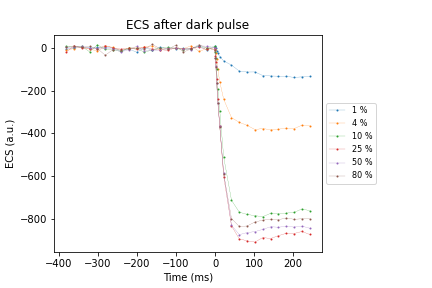

In [26]:
fig, ax = plt.subplots()
for i, k in enumerate(records):
    ax.plot(manip.clean_times[manip.records.index(k)], manip.clean_data[manip.records.index(k)], 'o-', label = f"{100*PWM_rel[i]:n} %", markersize = 1, linewidth = 0.2)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 8.1)
ax.set_xlabel("Time (ms)")
ax.set_ylabel("ECS (a.u.)")
ax.set_title("ECS after dark pulse")
#ax.set_xlim(-25, 70) 
plt.show()

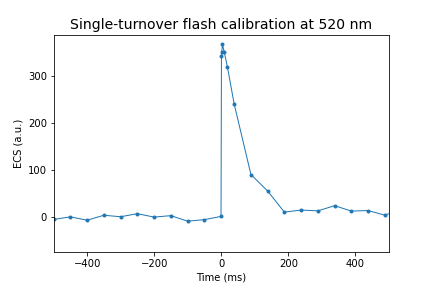

In [27]:
fig, ax = plt.subplots()
ax.plot(manip.clean_times[manip.records.index(flash)], manip.clean_data[manip.records.index(flash)], 'o-', markersize = 3, linewidth = 1)
ax.set_xlabel("Time (ms)")
ax.set_ylabel("ECS (a.u.)")
ax.set_xlim(-500, 500) 
ax.set_title("Single-turnover flash calibration at 520 nm", fontsize = 14)
plt.show()

# $E_{k}$ determination using PWM

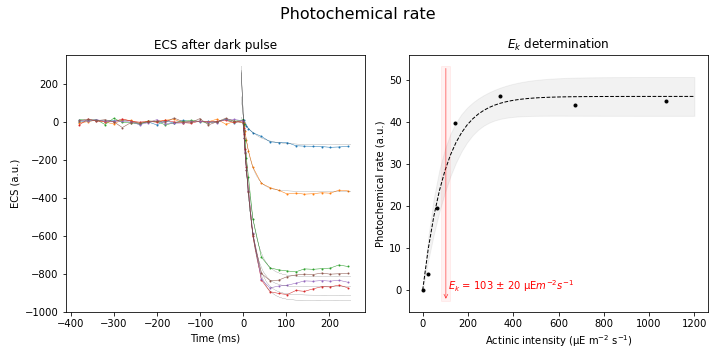

In [39]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
figure_name = "Photochemical rate "
fig.suptitle(figure_name, fontsize = 16)

Intensity = 1326 * np.asarray(PWM_rel) + 11.9
Intensity_rel = PWM_rel.copy()

start = -5
stop = 250
num = 50
index_stop_fit = -8

xfit = []
yfit = []
param = []
vitesse = []


xdata = manip.clean_times[manip.records.index(records[0])][21:index_stop_fit]


for i, k in enumerate(records):
    ax1.plot(manip.clean_times[manip.records.index(k)], manip.clean_data[manip.records.index(k)], 'o-', label = f"{100*PWM_rel[i]:n} %", markersize = 1, linewidth = 0.5)
    ydata = manip.clean_data[manip.records.index(k)][21:index_stop_fit]
    popt, x, y =  tools.exp_decay_fit(xdata, ydata, start, stop, num, p0=[0, 100, 0])
    xfit.append(x)
    yfit.append(y)
    param.append(popt) 
    ax1.plot(xfit[i],yfit[i], '--', color ='k', linewidth = 0.2)
    vitesse.append(-param[i][0]/param[i][1])
    
ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("ECS (a.u.)")
ax1.set_title("ECS after dark pulse")
#ax1.set_xlim(-25, 70)
    
#Intensity.insert(0,0)
Intensity_rel = np.insert(Intensity_rel, 0, 0)
Intensity = np.insert(Intensity, 0, 0)
vitesse.insert(0,0)



Ek_fit = "exp_µE" # "lin", "exp"
if Ek_fit == "exp":   
    popt, pcov, xfit, yfit = tools.Ek_fit(Intensity_rel, vitesse, 0, 1, 50, p0 = [1.75, 0.2])
    err = tools.my_err(xfit, popt, pcov, mf.Ek)
    ax2.fill_between(xfit, yfit - 1.9*err, yfit + 1.9*err, alpha=0.05, color = 'k')
    ax2.plot(Intensity_rel, vitesse,'o', color ='k', markersize = 3)
    ax2.plot(xfit, yfit, '--', color ='k', linewidth = 1)
    Ek = popt[1]
    Ek_err = np.sqrt(np.diag(pcov))[1]
    ax2.annotate("", xy=(Ek, ax2.get_ylim()[0]), xytext=(Ek, ax2.get_ylim()[1]), arrowprops=dict(arrowstyle="->", color="red", linewidth = 0.5))
    ax2.fill_betweenx(ax2.get_ylim(), Ek - Ek_err, Ek + Ek_err, color='red', alpha=0.05)
    ax2.text(Ek + 0.1, 0.075, f"$E_k$ = {Ek:.3f} ± {Ek_err:.3f}", fontsize = 10, color = "red")
    ax2.axvline(x=5*Ek, color='k', linestyle='--')
    
    
if Ek_fit == "exp_µE":   
    popt, pcov, xfit, yfit = tools.Ek_fit(Intensity, vitesse, 0, 1200, 50, p0 = [200, 1.75])
    err = tools.my_err(xfit, popt, pcov, mf.Ek)
    ax2.fill_between(xfit, yfit - 1.9*err, yfit + 1.9*err, alpha=0.05, color = 'k')
    ax2.plot(Intensity, vitesse,'o', color ='k', markersize = 3)
    ax2.plot(xfit, yfit, '--', color ='k', linewidth = 1)
    Ek = popt[1]
    Ek_err = np.sqrt(np.diag(pcov))[1]
    ax2.annotate("", xy=(Ek, ax2.get_ylim()[0]), xytext=(Ek, ax2.get_ylim()[1]), arrowprops=dict(arrowstyle="->", color="red", linewidth = 0.5))
    ax2.fill_betweenx(ax2.get_ylim(), Ek - Ek_err, Ek + Ek_err, color='red', alpha=0.05)
    ax2.text(Ek + 10, 0.05, f"$E_k$ = {Ek:.0f} ± {Ek_err:.0f} µE$m^{{-2}} s^{{-1}}$", fontsize = 10, color = "red")



ax2.set_title("$E_{k}$ determination")
ax2.set_xlabel("Actinic intensity (µE m$^{-2}$ s$^{-1}$)")
#ax2.set_ylabel("Photochemical rate \n ($charge$ $separation$ $photosystem^{-1}$ $s^{-1}$)")
ax2.set_ylabel("Photochemical rate (a.u.)")
# ax2.set_xlim([0,0.13])
# ax2.set_ylim([0,100])

fig.tight_layout()

plt.show()

fig_folder = manip.path + "/Figures"
if not os.path.isdir(fig_folder):
    os.mkdir(fig_folder)

fig.savefig(fig_folder + "/" + figure_name + Ek_fit + ".png", dpi = 300, bbox_inches='tight')

In [40]:
import VitessePhotochimiquePWMClass
importlib.reload(VitessePhotochimiquePWMClass)

from VitessePhotochimiquePWMClass import PhotochemicalRate as PR

vit = PR("20230710_vitesse_photochimique", Flash_record_str= "8")

vit.calib

ValueError: too many values to unpack (expected 3)

In [ ]:
import VitessePhotochimiquePWMClass
importlib.reload(VitessePhotochimiquePWMClass)

from VitessePhotochimiquePWMClass import PhotochemicalRate as PR

names = ["20230719_vitesse_photochimique","20230720_vitesse_photochimique", "20230721_vitesse_photochimique","20230724_vitesse_photochimique"]
dates = [2,3,4,7]
replicates = []
vitesse = []
Ek = []
Ek_rel = []

for i, name in enumerate(names):
    replicates.append(PR(name))
    vitesse.append(replicates[i].vitesse)
    Ek.append(replicates[i].Ek)
    Ek_rel.append(replicates[i].Ek_rel)
    
Intensity_rel = replicates[0].intensity_rel
Intensity = replicates[0].intensity

ValueError: too many values to unpack (expected 3)

C:\Users\Orlando\AppData\Local\Temp\ipykernel_59164\3764596731.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,2, figsize = (10,4.5))


IndexError: invalid index to scalar variable.

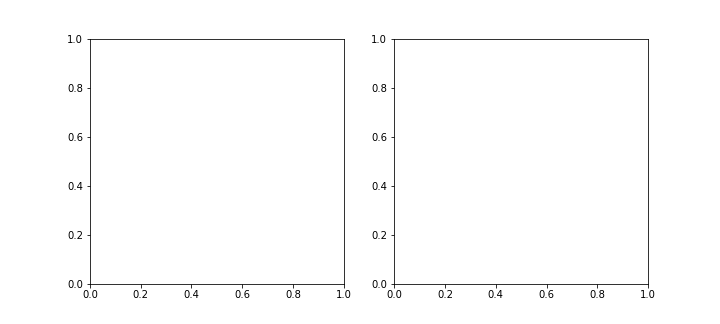

In [41]:
fig, ax = plt.subplots(1,2, figsize = (10,4.5))
colors = []
for i in range(len(names)):
    colors.append(mcolors.to_rgb('C'+str(i)))
    popt, pcov, xfit, yfit = tools.Ek_fit(Intensity, vitesse[i], 0, 1200, 50, p0 = [200, 100])
    ax[0].plot(Intensity, vitesse[i],'o', markersize = 4, label = f"Experiment {i}, Ek = {Ek[i]:.0f} µE$m^{{-2}}s^{{-1}}$", color=colors[i])
    ax[0].plot(xfit, yfit, '--', color='C'+str(i), linewidth = 1)
    ax[0].annotate("", xy=(Ek[i], ax[0].get_ylim()[0]), xytext=(Ek[i], ax[0].get_ylim()[1]), arrowprops=dict(arrowstyle="->", color=colors[i], linewidth = 1))
    

    err = tools.my_err(xfit, popt, pcov, mf.Ek)
    ax[0].fill_between(xfit, yfit - 1.94*err, yfit + 1.94*err, alpha=0.05, color = 'k')

    
    
ax[0].set_title("$E_{k}$ determination")
ax[0].set_xlabel("Actinic intensity")
ax[0].set_ylabel("Photochemical rate \n ($charge$ $separation$ $photosystem^{-1}$ $s^{-1}$)")
ax[0].legend()

ax[1].scatter(dates, Ek, c = colors)
ax[1].axhline(y = np.mean(Ek), color = 'k', alpha = 0.5, linestyle = '--', linewidth = 1)
ax[1].text(dates[-1], np.mean(Ek), f"$E_k$ = {np.mean(Ek):.0f} ± {np.std(Ek):.0f} µE$m^{{-2}}s^{{-1}}$", ha='right', va='bottom', fontsize=10, color='k')
ax[1].set_xlabel("Days in turbidostatic growth")
ax[1].set_ylabel("$E_{k}$ (µE m$^{-2}$ s$^{-1}$)")
ax[1].set_title("$E_{k}$ evolution")
ax[1].set_ylim([0,200])

fig.tight_layout()

fig.savefig("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Apresentaçoes/Experiments/Ek.png", dpi=300)
 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


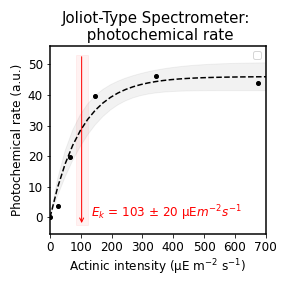

In [45]:
fig, ax2 = plt.subplots(figsize = (4,4))
Intensity = 1326 * np.asarray(PWM_rel) + 11.9
Intensity_rel = PWM_rel.copy()

start = -5
stop = 250
num = 50
index_stop_fit = -8

xfit = []
yfit = []
param = []
vitesse = []


xdata = manip.clean_times[manip.records.index(records[0])][21:index_stop_fit]


for i, k in enumerate(records):
    ydata = manip.clean_data[manip.records.index(k)][21:index_stop_fit]
    popt, x, y =  tools.exp_decay_fit(xdata, ydata, start, stop, num, p0=[0, 100, 0])
    xfit.append(x)
    yfit.append(y)
    param.append(popt) 
    vitesse.append(-param[i][0]/param[i][1])
    
#Intensity.insert(0,0)
Intensity_rel = np.insert(Intensity_rel, 0, 0)
Intensity = np.insert(Intensity, 0, 0)
vitesse.insert(0,0)

popt, pcov, xfit, yfit = tools.Ek_fit(Intensity, vitesse, 0, 1200, 50, p0 = [200, 1.75])
err = tools.my_err(xfit, popt, pcov, mf.Ek)
ax2.fill_between(xfit, yfit - 1.9*err, yfit + 1.9*err, alpha=0.05, color = 'k')
ax2.plot(Intensity, vitesse,'o', color ='k', markersize = 4)
ax2.plot(xfit, yfit, '--', color ='k', linewidth = 1.5)
Ek = popt[1]
Ek_err = np.sqrt(np.diag(pcov))[1]
ax2.annotate("", xy=(Ek, ax2.get_ylim()[0]), xytext=(Ek, ax2.get_ylim()[1]), arrowprops=dict(arrowstyle="->", color="red", linewidth = 1))
ax2.fill_betweenx(ax2.get_ylim(), Ek - Ek_err, Ek + Ek_err, color='red', alpha=0.05)
ax2.text(Ek + 30, 0.05, f"$E_k$ = {Ek:.0f} ± {Ek_err:.0f} µE$m^{{-2}}s^{{-1}}$", fontsize = 12, color = "red")



ax2 = tools.poster_axes(ax2, title= "Joliot-Type Spectrometer: \n photochemical rate", xlabel = "Actinic intensity (µE m$^{-2}$ s$^{-1}$)", ylabel = "Photochemical rate (a.u.)", labelsize= 12)
ax2.set_xlim([0,700])

fig.tight_layout()

plt.show()

fig_folder = manip.path + "/Figures"
if not os.path.isdir(fig_folder):
    os.mkdir(fig_folder)

fig.savefig(fig_folder + "/" + figure_name + Ek_fit + "poster.png", dpi = 300, bbox_inches='tight')